
Используя знания из практической части урока и функцию `blur_face` (размытие), проведите следующий эксперимент:
1. Найдите фото любого известного актера или актрисы.
2. Распознайте лицо на фотографии. Выделите лицо овалом. Какой метод для рисования овала использовать, вы должны найти самостоятельно.
3. Выделите на изображении глаза. Выделите их кружком. Если вы чувствуете в себе суперсилу и дополнительный бекграунд знаний, и хотите получить больше баллов за задание, то нарисуйте вместо кружков солнцезащитные очки (картинку очков можно найти в интернете, задача их правильно масштабировать и разместить).
4. Все лицо кроме глаз необходимо "заблюрить" (размыть) с помощью функции `blur_face` (функция объявлена ниже).




Оценка за задание:
* 1 балл - задача решена с помощью куратора, лицо распознано прямоугольником, глаза кругом.
* 2 балла - задача решена с незначительными подсказками куратора, лицо распознано прямоугольником или кругом, глаза кругом, лицо размыто.
* 3 балла - задача решена самостоятельно, лицо распознано овалом, глаза кругом, удалось заблюрить лицо, не затронув глаза.
* 4 балла - задача решена самостоятельно на 3 балла, удалось нарисовать очки с подсказкой куратора, недостаточна соблюдена симметрия расположения очков или недостаточно учтены их размеры.
* 5 баллов - задача полностью решена самостоятельно, все пункты выполнены.

In [ ]:
import cv2

def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)



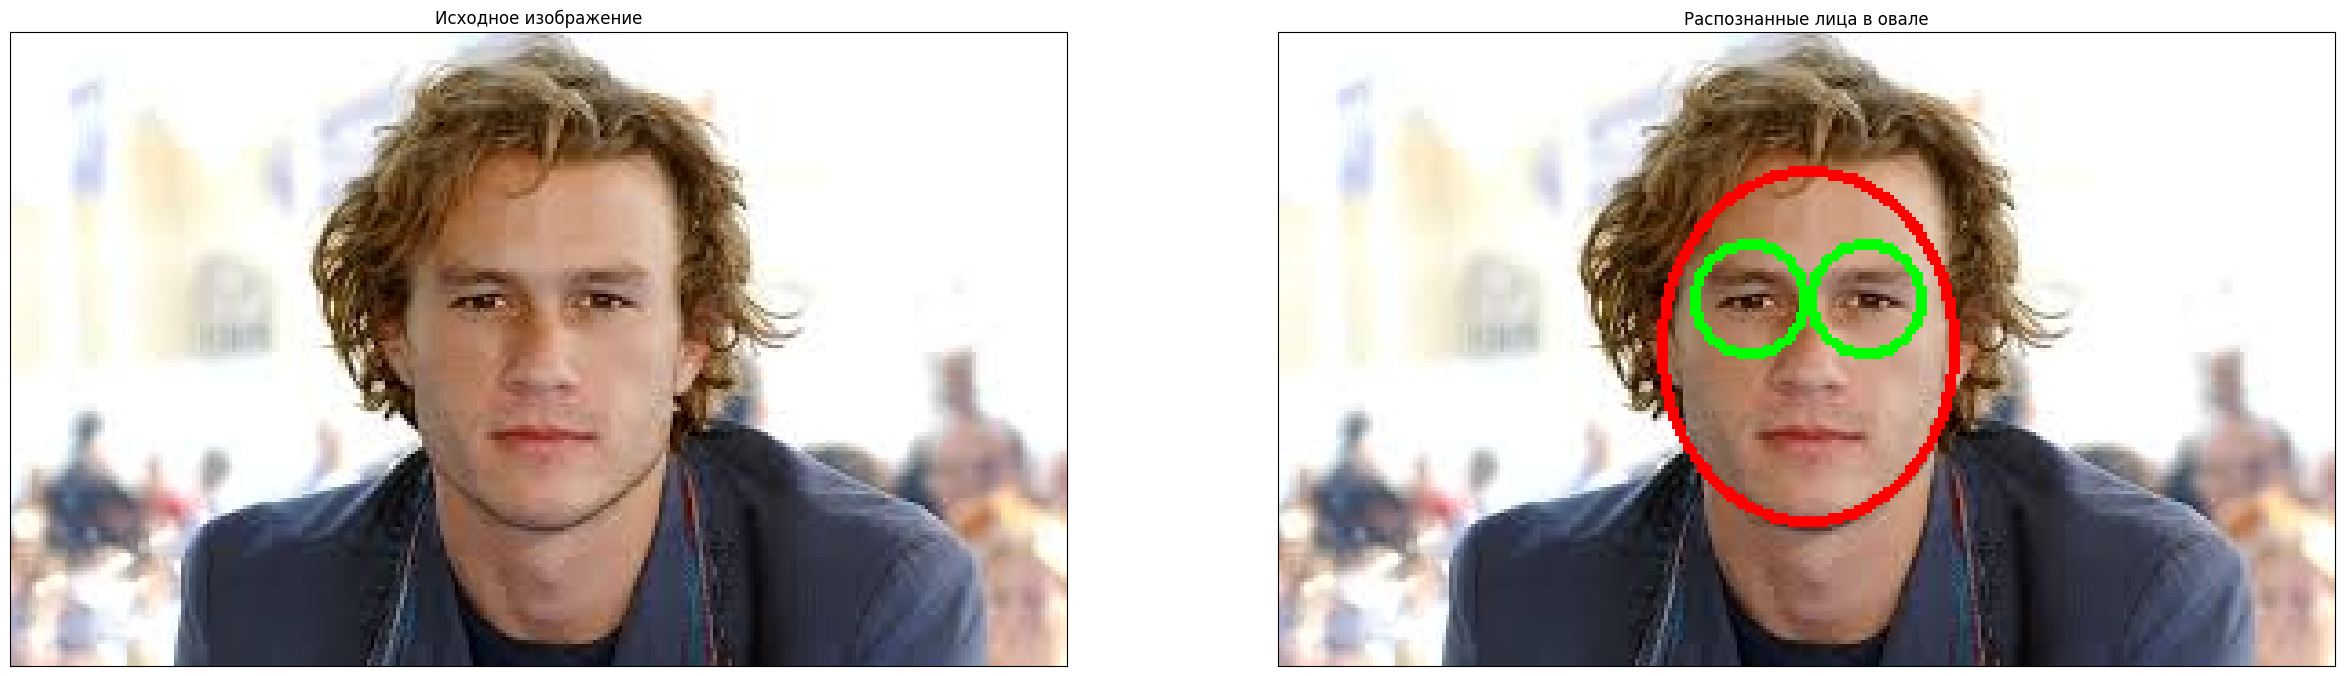

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
%matplotlib inline
image_path = './HL.jpg'
img = cv2.imread(image_path)

# Загрузка изображения
img = cv2.imread('./HL.jpg')
img2 = img.copy()

# Загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
# Выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# Формирование овала
for box in bboxes:
    x, y, width, height = box
    center_x, center_y = x + width // 2, y + height // 2

    radius = max(width // 2, height // 3)

    start_angle = 0
    end_angle = 360
    cv2.ellipse(img2, (center_x, center_y), (40, radius), 0, start_angle, end_angle, (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width]

    eyes = classifier_eye.detectMultiScale(face)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:


        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0)
        thickness = 2

        cv2.circle(face, center, radius, color, thickness)



fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(30, 15))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица в овале')

pyplot.show()

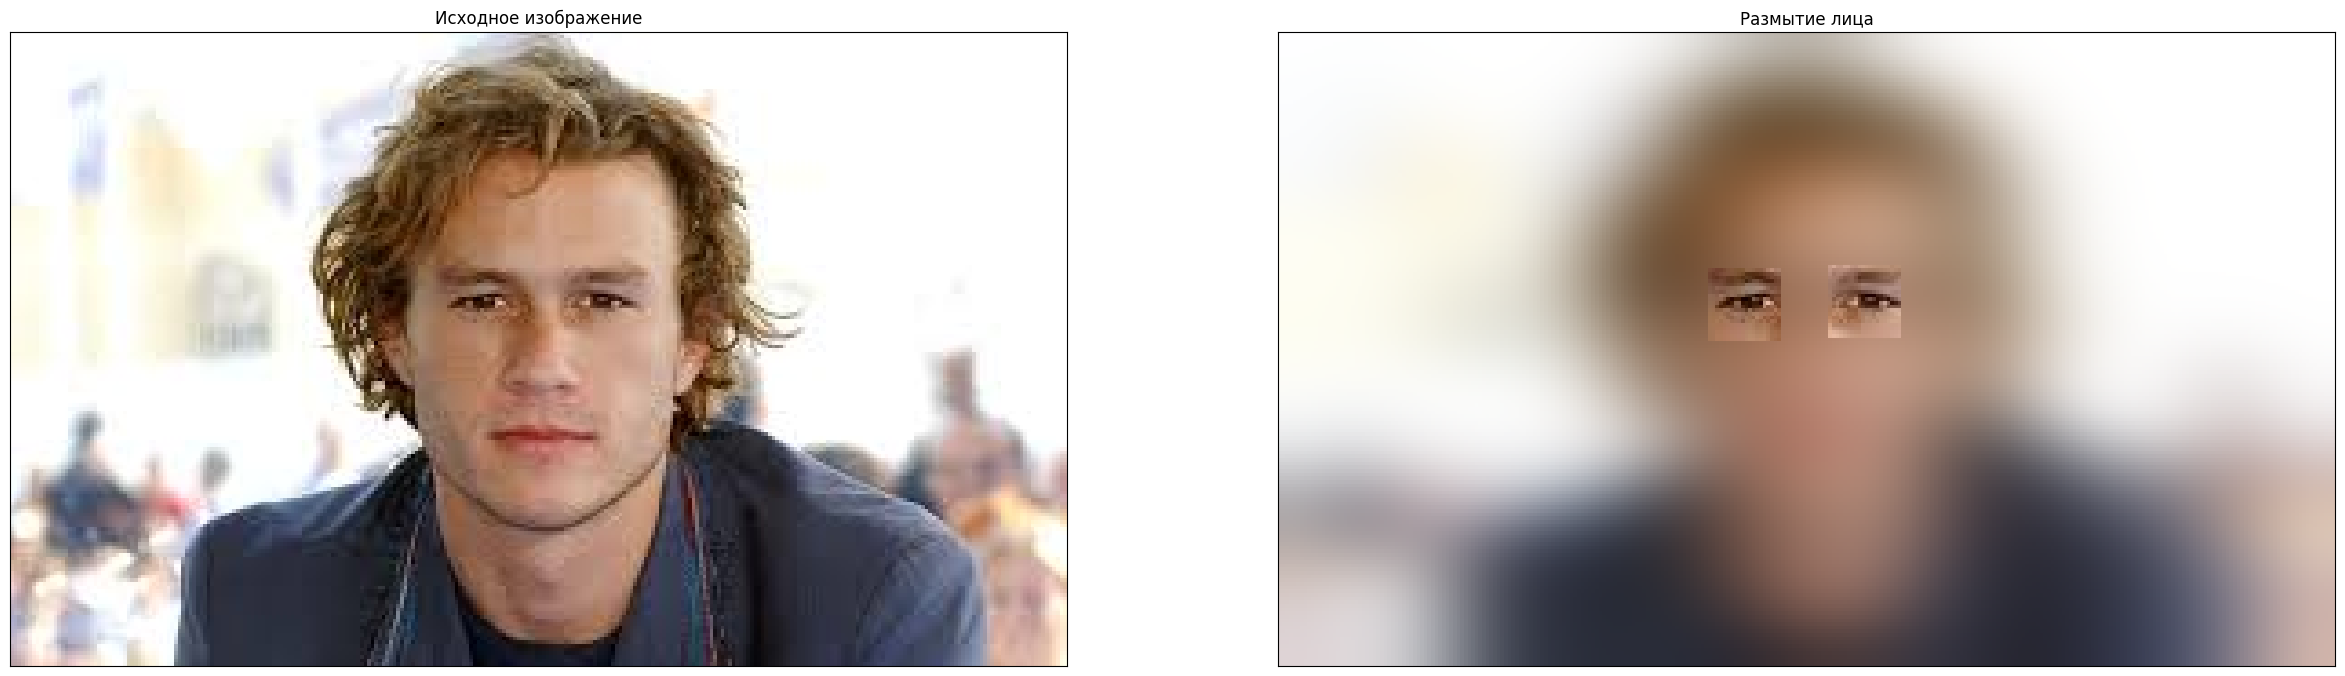

In [ ]:
import cv2

def blur_face(img):
    (h, w) = img.shape[:2]
    dW = int(w / 3.0)
    dH = int(h / 3.0)
    if dW % 2 == 0:
        dW -= 1
    if dH % 2 == 0:
        dH -= 1
    return cv2.GaussianBlur(img, (dW, dH), 0)

# Загрузка изображения
img = cv2.imread("./HL.jpg")

# Загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Обнаружение глаз
eyes = classifier_eye.detectMultiScale(gray, scaleFactor=5.5, minNeighbors=2, minSize=(5, 5))

# Размытие всего лица
blurred_face = blur_face(img)


result = blurred_face.copy()


for (ex, ey, ew, eh) in eyes:
    result[ey:ey+eh, ex:ex+ew] = img[ey:ey+eh, ex:ex+ew]


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(30, 15))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Размытие лица')

pyplot.show()

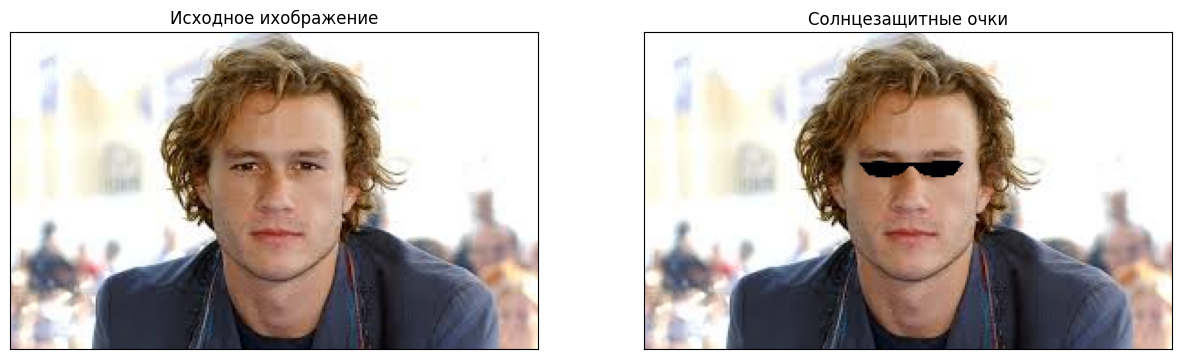

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot

%matplotlib inline

image_path = './HL.jpg'
img = cv2.imread(image_path)
img2 = img.copy()
# Загрузка изображения очков
glasses_path = './21.png'
glasses_img = cv2.imread(glasses_path, cv2.IMREAD_UNCHANGED)

# Загрузка каскад Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

for box in bboxes:
    x, y, width, height = box
    face = img[y:y + height, x:x + width]

    # Выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)


    eye_rects = []
    for (x_eye, y_eye, w_eye, h_eye) in eyes:
        eye_rects.append((x_eye, y_eye, w_eye, h_eye))

    combined_eye_rect = (min([r[0] for r in eye_rects]),
                         min([r[1] for r in eye_rects]),
                         max([r[0] + r[2] for r in eye_rects]) - min([r[0] for r in eye_rects]),
                         max([r[1] + r[3] for r in eye_rects]) - min([r[1] for r in eye_rects]))

    # смещение
    shift_x = 98
    shift_y = 40

    glasses_img_resized = cv2.resize(glasses_img, (combined_eye_rect[2], combined_eye_rect[3]))


    new_x = combined_eye_rect[0] + shift_x
    new_y = combined_eye_rect[1] + shift_y


    glasses_roi = img[new_y:new_y + glasses_img_resized.shape[0],
                      new_x:new_x + glasses_img_resized.shape[1]]


    glasses_mask = glasses_img_resized[:,:,3] / 255.0
    glasses_mask = np.stack([glasses_mask]*3, axis=-1)


    glasses_overlay = (1 - glasses_mask) * glasses_roi + glasses_mask * glasses_img_resized[:,:,:3]


    img[new_y:new_y + glasses_img_resized.shape[0],
    new_x:new_x + glasses_img_resized.shape[1]] = glasses_overlay

fig, (ax2,ax1) = pyplot.subplots(1, 2, figsize=(15, 8))
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Исходное ихображение')
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Солнцезащитные очки')
pyplot.show()

Изображения, которые использовались

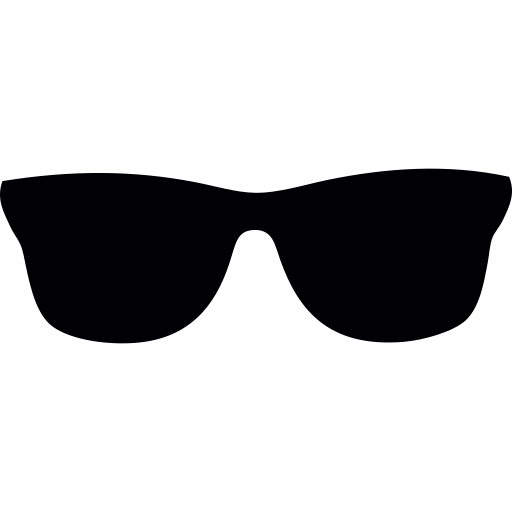

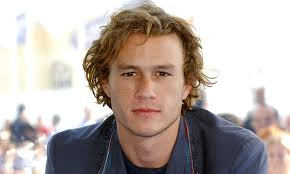